# Data Visualizations
**Pie Charts, Box Plots, Scatter Plots, and Bubble Plots**

<h2>Importing Libraries</h2>

In [43]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.10.0


## Importing Data <a id="2"></a>
Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website.<br>
In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset* and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.
<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/june2023_updates/Module%201/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)

In [44]:
df_can = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")

print('Data read into a pandas DataFrame!')

Data read into a pandas DataFrame!


In [45]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [46]:
print(df_can.shape)

(195, 39)


<h2>visulaizing Data Using Matplotlib</h2>
For plotting the data easilty, let's first set the country name as index - useful for quickly looking up countries using .loc method.


In [47]:
df_can.set_index('Country', inplace=True)

In [48]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Notice now the country names now as a indices

In [49]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


Finally, let's create a list of years from 1980 - 2013, this will come in handy when we start plotting the data

In [50]:
years = list(map(str, range(1980, 2014)))

# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">

In [51]:
# Group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis=0).sum()

# Note : The output of the groupby method is a 'groupby' object.
# We can not use it further until we apply a funtion (eg. sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_28856\4169285243.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis=0).sum()
C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_28856\4169285243.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df_can.groupby('Continent', axis=0)))


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


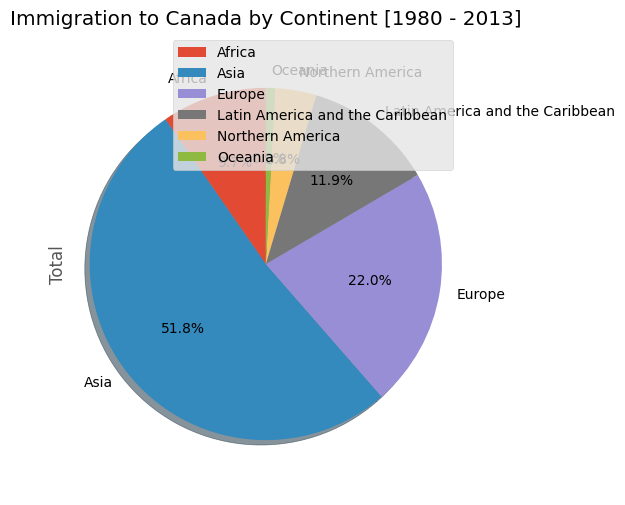

In [52]:
df_continents['Total'].plot(kind = 'pie',
                            figsize = (5, 6),
                            autopct = '%1.1f%%', # add in percentages
                            startangle = 90,
                            shadow = True,
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # sets the pie chart to looks like a circle
plt.legend(labels = df_continents.index, loc = 'upper right')

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.

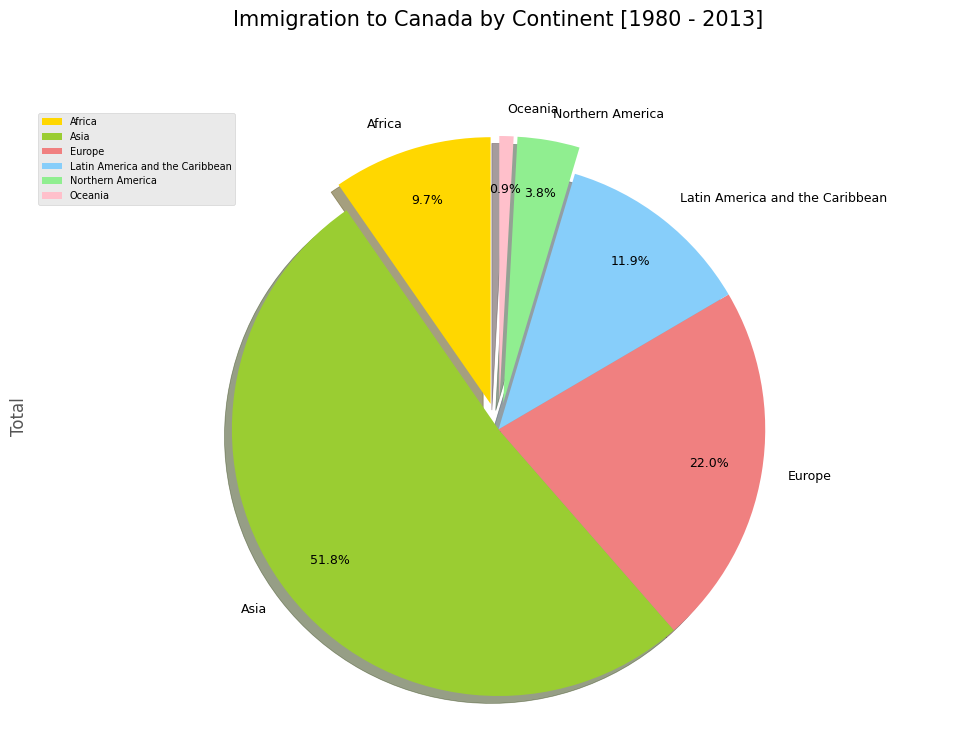

In [53]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind = 'pie',
                            figsize = (12, 8),
                            autopct = '%1.1f%%',
                            startangle = 90,
                            shadow = True,
                            label = None, # turns off labels on pie
                            pctdistance = 0.8, # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors = colors_list,
                            explode = explode_list,
                            textprops={'fontsize': 9}
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15)

plt.axis('equal')

plt.legend(labels = df_continents.index, loc = 'upper left', fontsize = 7)

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

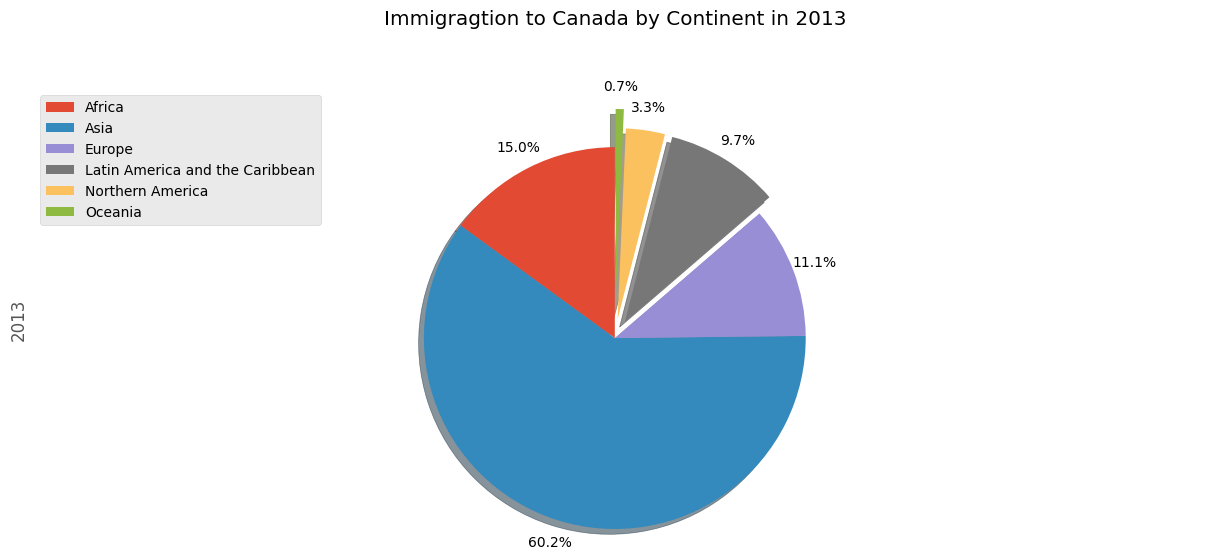

In [54]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]

df_continents['2013'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct = '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           explode=explode_list
                          )

plt.title('Immigragtion to Canada by Continent in 2013', y=1.12)

plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

<h2>Box Plots</h2>
A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">

To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [55]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by Passinng in kind = 'box'

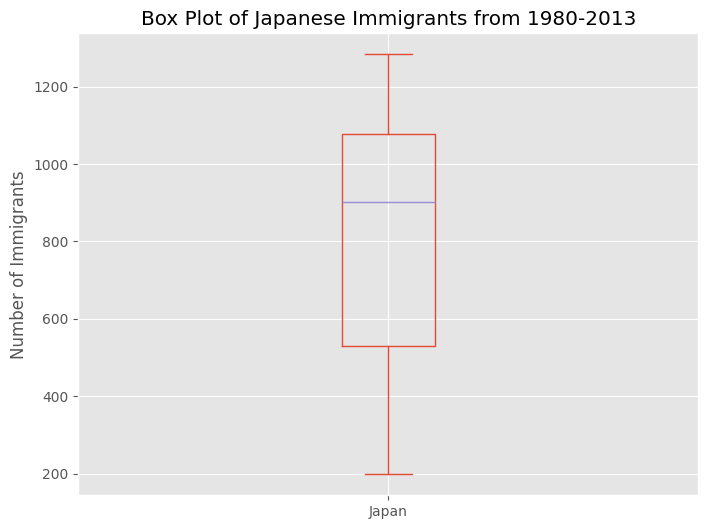

In [58]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [59]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe **df_CI**.

In [62]:
df_CI = df_can.loc[['India', 'China'], years].transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


Let's view the percentiles associated with both countries using the `describe()` method.

In [63]:
df_CI.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


Step 2: Plot data.

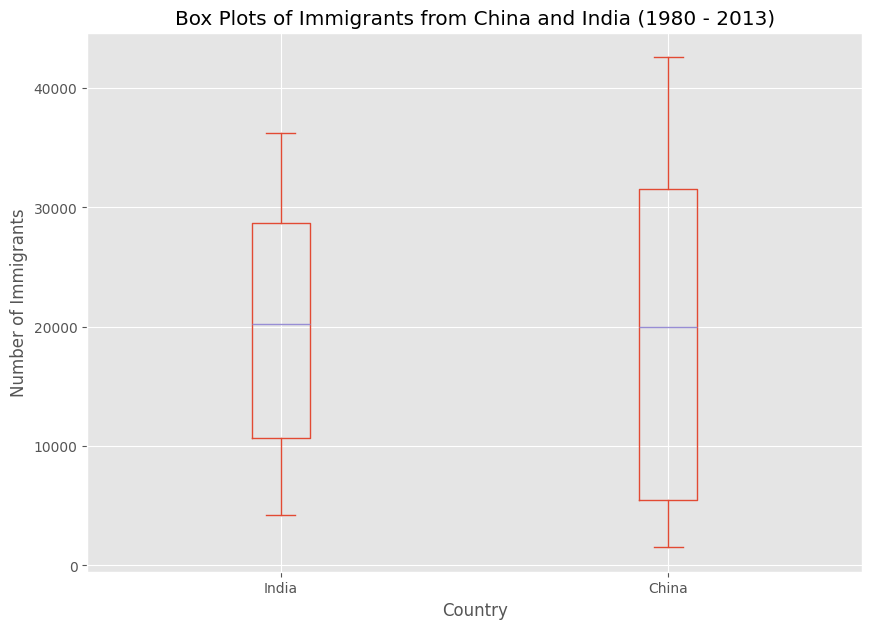

In [69]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box Plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Country')
plt.show()

We can observe that, while both countries have around the same median immigrant population (\~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).


If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to *False*. You can also specify a different color in case you are not a big fan of the default red color.


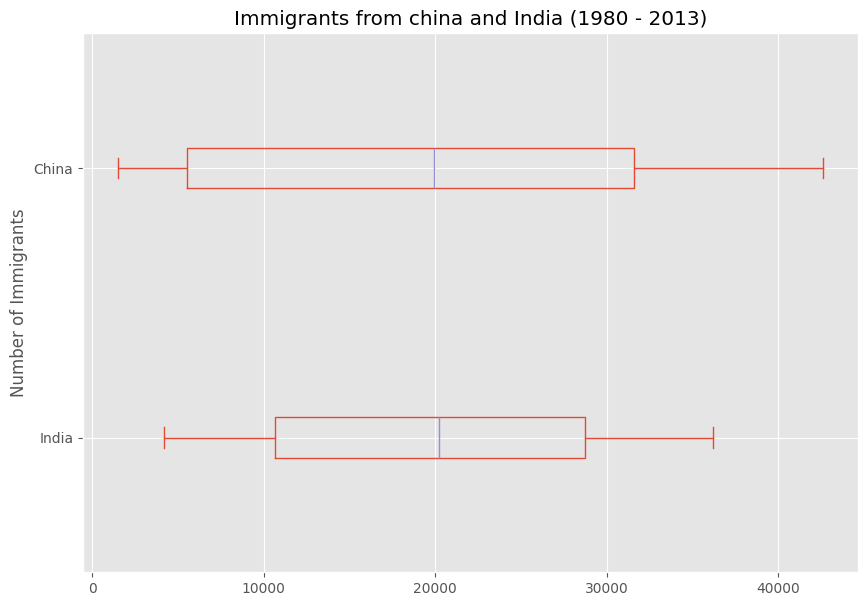

In [70]:
df_CI.plot(kind='box', vert=False, figsize=(10, 7))

plt.title('Immigrants from china and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">


We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:

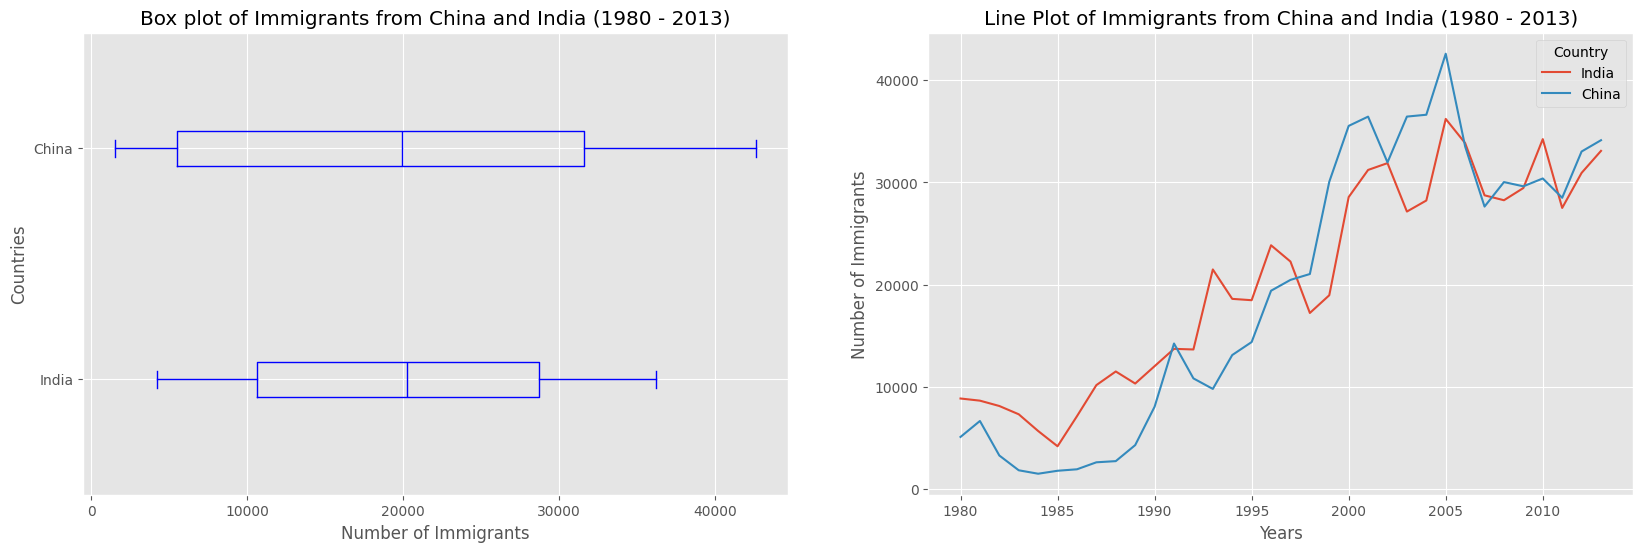

In [72]:
fig = plt.figure() # Create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# subplot 1: box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box plot of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# subplot 2: line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title('Line Plot of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).


Let's try something a little more advanced.

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.

In [76]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0)
df_top15.head(15)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.

In [78]:
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

new_df = pd.DataFrame({'1980s' : df_80s, '1990s' : df_90s, '2000s' : df_00s})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


Let's learn more about the statistics associated with the dataframe using the `describe()` method.

In [79]:
new_df.describe()

,1980s,1990s,2000s
count,195.000000,195.000000,195.000000
mean,5422.938462,10021.492308,12105.538462
std,17099.940917,29129.244091,37447.413889
min,0.000000,0.000000,0.000000
25%,10.000000,196.500000,265.000000
50%,240.000000,1051.000000,1979.000000
75%,3321.500000,6577.500000,8003.000000
max,179171.000000,261966.000000,340385.000000


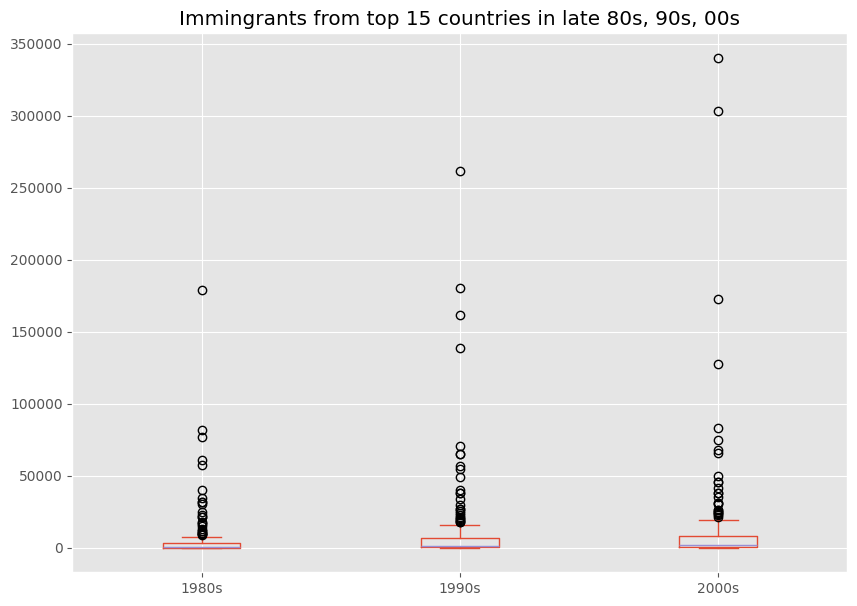

In [81]:
new_df.plot(kind='box', figsize=(10, 7))

plt.title('Immingrants from top 15 countries in late 80s, 90s, 00s')
plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5

In [82]:
# let's check how many entries fall above the outlier threshold 

new_df = new_df.reset_index()
new_df[new_df['2000s'] > 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

The box plot is an advanced visualizaiton tool, and there are many options and customizations that exceed the scope of this lab. Please refer to [Matplotlib documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) on box plots for more information.

# Thank You IBM
<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>